# Forecast the Airlines passanger dataset. Prepare a document for each model explaining
 * how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
airline=pd.read_excel('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 18 forecasting/Airlines+Data.xlsx')
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
airline.shape

(96, 2)

In [4]:
airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
airline.set_index('Month',inplace=True)
airline.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [6]:
airline1=airline.copy() # For Future use.
airline2=airline.copy()
airline1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [7]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<AxesSubplot:>

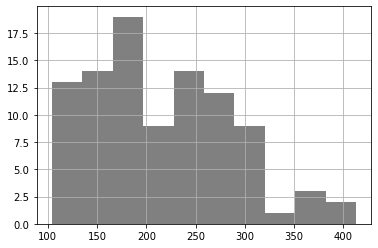

In [8]:
airline['Passengers'].hist(color='grey')

<AxesSubplot:ylabel='Density'>

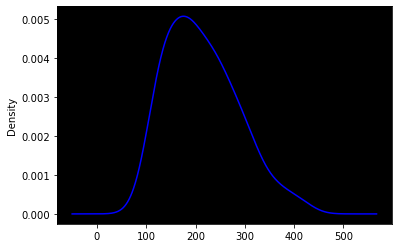

In [9]:
ax=plt.axes()
ax.set_facecolor('black')
airline['Passengers'].plot(kind='kde',color='blue')

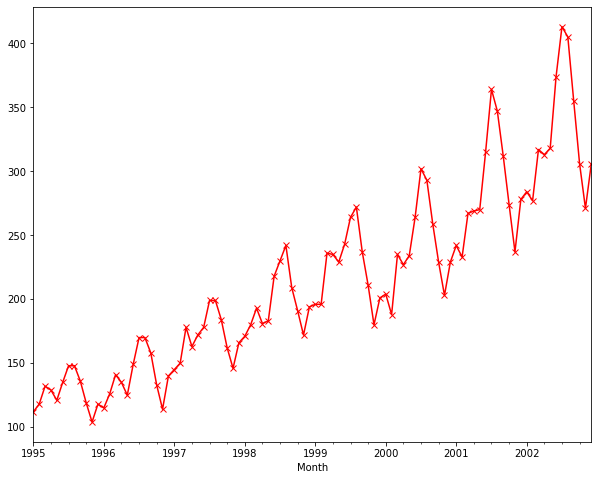

In [10]:
airline.Passengers.plot(figsize=(10,8),color='red',marker='x')
plt.show()

<AxesSubplot:xlabel='Passengers'>

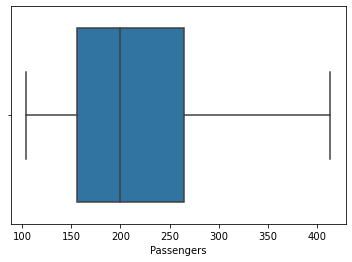

In [11]:
sns.boxplot('Passengers',data=airline)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

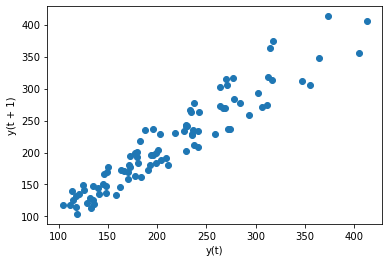

In [12]:
from pandas.plotting import lag_plot
lag_plot(airline['Passengers'])

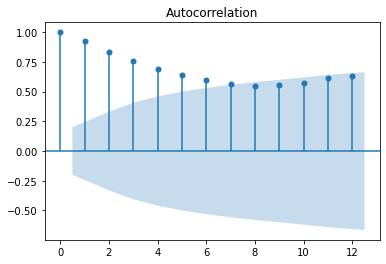

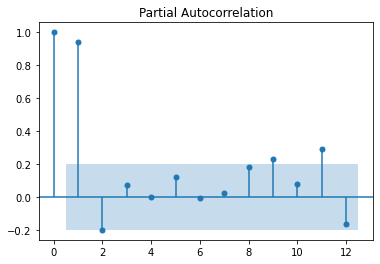

In [13]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airline.Passengers,lags=12)
tsa_plots.plot_pacf(airline.Passengers,lags=12)
plt.show()

##  Data Driven Forecasting methods

In [14]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [15]:
# Spliting data
train=airline.head(84)
test=airline.tail(12)

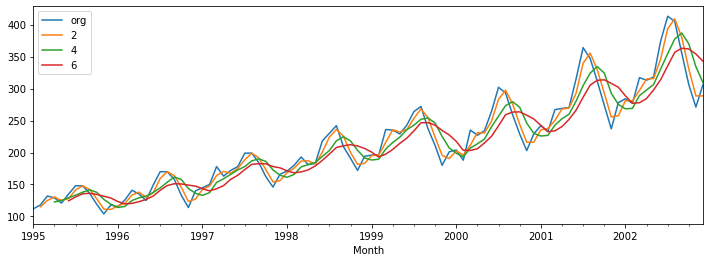

In [16]:
plt.figure(figsize=(12,4))
airline.Passengers.plot(label='org')
for i in range(2,8,2):
    airline['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

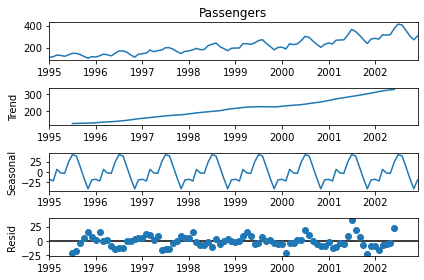

In [17]:
# Time series decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add=seasonal_decompose(airline.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [18]:
# Evaluation Metric rmse
def RMSE(org,pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [19]:
# Simple Exponential Method
ses_model=SimpleExpSmoothing(train['Passengers']).fit()
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
rmse_ses_model=RMSE(test.Passengers,pred_ses)
rmse_ses_model

C:\Users\Osama Khan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


68.0067403134932

In [20]:
# Holt Method
hw_model=Holt(train['Passengers']).fit()
pred_hw_model=hw_model.predict(start=test.index[0],end=test.index[-1])
rmse_hw_model=RMSE(test.Passengers,pred_hw_model)
rmse_hw_model

C:\Users\Osama Khan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


58.53117812596795

In [21]:
#Holt winter exponential smoothing  with additive seasonality and additive trend
hw_model_add_add=ExponentialSmoothing(train['Passengers'],seasonal='add',trend='add',seasonal_periods=4).fit()
pred_hw_model_add=hw_model_add_add.predict(start=test.index[0],end=test.index[-1])
rmse_model_add=RMSE(test.Passengers,pred_hw_model_add)
rmse_model_add

C:\Users\Osama Khan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


62.99109700445373

In [22]:
# Holt winter exponential smoothing with multiplicative seasonality and additive trend
hw_model_mul_add=ExponentialSmoothing(train['Passengers'],seasonal='mul',trend='add',seasonal_periods=4).fit()
pred_hw_mul=hw_model_mul_add.predict(start=test.index[0],end=test.index[-1])
rmse_hw_mul=RMSE(test.Passengers,pred_hw_mul)
rmse_hw_mul

C:\Users\Osama Khan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


64.69311722038927

## Model based forecasting method

In [23]:
airline1['t']=np.arange(1,97)
airline1['t_squared']=airline1['t']*airline1['t']
airline1['log_passenger']=np.log(airline1['Passengers'])
airline1.head()

,Passengers,t,t_squared,log_passenger
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791


In [24]:
# splitting data
train=airline1.head(84)
test=airline1.tail(12)

In [25]:
# Linear model
import statsmodels.formula.api as smf

linear_model=smf.ols('Passengers~t',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=RMSE(test['Passengers'],pred_linear)
rmse_linear

53.19923653480271

In [26]:
# Exponential model
exp_model=smf.ols('log_passenger~t',data=train).fit()
pred_exp_model=pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exp_model=RMSE(test['Passengers'],pred_exp_model)
rmse_exp_model

325.7150613551535

In [27]:
# Quadratic model
quad_model=smf.ols('Passengers~t+t_squared',data=train).fit()
pred_quad_model=pd.Series(quad_model.predict(pd.DataFrame(test[['t','t_squared']])))
rmse_quad_model=RMSE(test['Passengers'],pred_quad_model)
rmse_quad_model

48.051888979331565

## ARIMA Model

In [28]:
airline2

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [29]:
# separate out a validation datasets
split_point=len(airline2)-12
dataset,validation=airline2[0:split_point],airline2[split_point:]
print('Dataset %d validation %d' %(len(dataset),len(validation)))
dataset.to_csv('dataset.csv',header=False)
validation.to_csv('validation.csv',header=False)

Dataset 84 validation 12


In [30]:
# Persistence / Base model
# Evaluate persistence model.
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
train=read_csv('dataset.csv',header=None,index_col=0,parse_dates=True,squeeze=True)
X=train.values
X=X.astype('float32')
train_size= int(len(X)*0.715)
train,test=X[0:train_size],X[train_size:]

In [31]:
print(train.shape)
print(test.shape)

(60,)
(24,)


In [32]:
# walk forward validation
history=[x for x in train]
predictions= list()
for i in range(len(test)):
    yhat=history[-1]
    predictions.append(yhat)
# observation
obs=test[i]
history.append(obs)
print('>predicted=%.3f ,Expected=%.3f' % (yhat,obs))
# Report performance
rmse=sqrt(mean_squared_error(test,predictions))
print('RMSE:%.3f' % rmse)


>predicted=201.000 ,Expected=278.000
RMSE:74.406


In [33]:
rmse_persistence_model=74.406

## ARIMA Hyperparameter

In [34]:
series=pd.read_excel('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 18 forecasting/Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True)

In [35]:
series.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [36]:
# Separate out a validation dataset
split_point=len(series)-12
dataset,validation=series[0:split_point],series[split_point:]
print('Dataset %d,validation %d'%(len(dataset),len(validation)))
dataset.to_csv('dataset.csv',header=False)
validation.to_csv('validation.csv',header=False)

Dataset 84,validation 12


In [51]:
# grid search ARIMA  parameters  for time series
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an Arima model fro given order(p,d,q)and return rmse
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [52]:
# evaluate combination of p,d,q for ARIMA model
def evaluate_models(dataset,p_values,d_values,q_values):
    dataset=dataset.astype('float32')
    best_score,best_cfg=float('inf'),None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    rmse=evaluate_arima_model(train,order)
                    if rmse<best_score:
                        best_score,best_cfg=rmse,order
                    print('ARIMA%s RMSE=%.3f'%(order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f'%(best_cfg,best_score))

In [53]:
# load dataset
train=pd.read_csv('dataset.csv',header=None,index_col=0,parse_dates=True,squeeze=True)

In [55]:
# evaluate parameters
p_values=range(0,5)
d_values=range(0,5)
q_values=range(0,5)
warnings.filterwarnings('ignore')
evaluate_models(train.values,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=78.356
ARIMA(0, 0, 1) RMSE=44.790
ARIMA(0, 1, 0) RMSE=26.206
ARIMA(0, 1, 1) RMSE=25.582
ARIMA(0, 1, 2) RMSE=28.099
ARIMA(0, 1, 3) RMSE=23.953
ARIMA(0, 1, 4) RMSE=22.830
ARIMA(0, 2, 0) RMSE=32.545
ARIMA(0, 2, 1) RMSE=26.939
ARIMA(0, 2, 2) RMSE=26.175
ARIMA(0, 2, 3) RMSE=28.230
ARIMA(0, 2, 4) RMSE=25.211
ARIMA(1, 0, 0) RMSE=26.445
ARIMA(1, 0, 1) RMSE=25.611
ARIMA(1, 1, 0) RMSE=25.940
ARIMA(1, 2, 0) RMSE=31.784
ARIMA(2, 0, 0) RMSE=25.991
ARIMA(2, 1, 0) RMSE=25.659
ARIMA(2, 2, 0) RMSE=30.766
ARIMA(3, 0, 0) RMSE=25.820
ARIMA(3, 0, 1) RMSE=25.294
ARIMA(3, 1, 0) RMSE=25.765
ARIMA(3, 2, 0) RMSE=30.978
ARIMA(4, 0, 0) RMSE=26.056
ARIMA(4, 1, 0) RMSE=25.190
ARIMA(4, 2, 0) RMSE=29.503
ARIMA(4, 2, 1) RMSE=25.848
Best ARIMA(0, 1, 4) RMSE=22.830


In [67]:
rmse_ARIMA_model=22.830

## Build model based on optimized values

In [57]:
# load data
train=pd.read_csv('dataset.csv',header=0,index_col=0,parse_dates=True)
#prepare data
X=train.values
X=X.astype('float32')

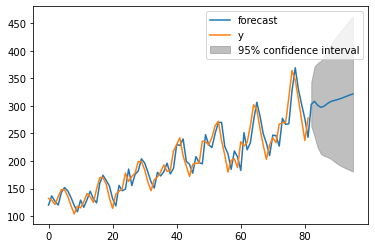

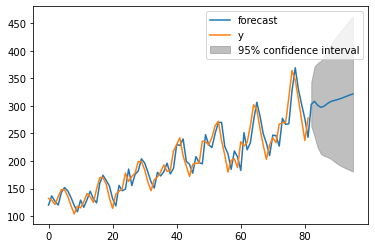

In [59]:
# fit model
model=ARIMA(X,order=(3,1,0))
model_fit=model.fit()
forecast=model_fit.forecast(steps=12)[0]
model_fit.plot_predict(1,96)

In [60]:
# Error on test data
val=pd.read_csv('validation.csv',header=None)
rmse=sqrt(mean_squared_error(val[1],forecast))
rmse

51.13509979849091

## combine train and test and build final model

In [61]:

data=pd.read_excel('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 18 forecasting/Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True)

In [62]:
X=train.values
X=X.astype('float32')

In [63]:
model=ARIMA(X,order=(0,1,4))
model_fit=model.fit()


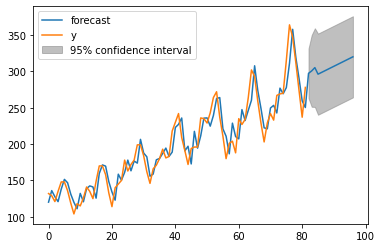

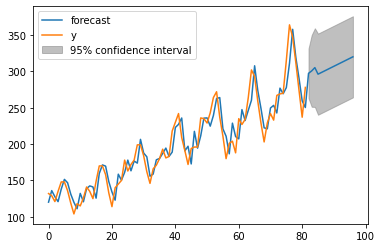

In [64]:
forecast=model_fit.forecast(steps=12)[0]
model_fit.plot_predict(1,97)

In [65]:
forecast

array([297.29505083, 300.66282676, 305.18876246, 296.168753  ,
       298.33912965, 300.50950631, 302.67988296, 304.85025961,
       307.02063627, 309.19101292, 311.36138957, 313.53176623])

In [70]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_model_add],['HW exp smoothing mult',rmse_hw_mul],
          ['Linear Mode',rmse_linear],['Exp model',rmse_exp_model],['Quad model',rmse_quad_model],
          ['Persistence/ Base model', rmse_persistence_model], ['ARIMA Model', rmse_ARIMA_model]]

In [73]:
table_rmse=pd.DataFrame(list,columns=['Model','RMSE_Values'])
table_rmse.sort_values(['Model','RMSE_Values'])

,Model,RMSE_Values
8,ARIMA Model,22.830000
5,Exp model,325.715061
2,HW exp smoothing add,62.991097
3,HW exp smoothing mult,64.693117
1,Holt method,58.531178
4,Linear Mode,53.199237
7,Persistence/ Base model,74.406000
6,Quad model,48.051889
0,Simple Exponential Method,68.006740
